In [5]:
# Step 1: Import necessary libraries
import pandas as pd
from google.colab import drive

# Step 3: Use the correct path to load the file from your Google Drive
# Make sure to update 'your-folder-name' to match the location of your file in Google Drive
file_path = '/content/drive/MyDrive/traffic.csv'

# Step 4: Load the CSV file
df = pd.read_csv(file_path, index_col=[0], parse_dates=[0])
df.head()  # Display the first few rows to verify




,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [6]:
!ls


drive  sample_data


In [7]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/traffic.csv', index_col=[0], parse_dates=[0])

# Display the first few rows to verify
df.head()


,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [8]:
# Get basic information about the DataFrame
df.info()

# Get summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48120 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   ID        48120 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


,0
Junction,0
Vehicles,0
ID,0


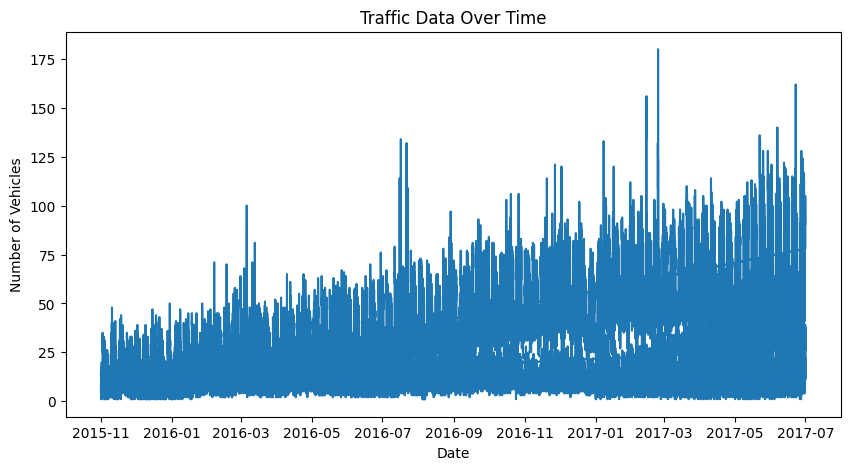

In [9]:
import matplotlib.pyplot as plt

# Plot the data (replace 'Vehicles' with the appropriate column name)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Vehicles'])
plt.title('Traffic Data Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.show()


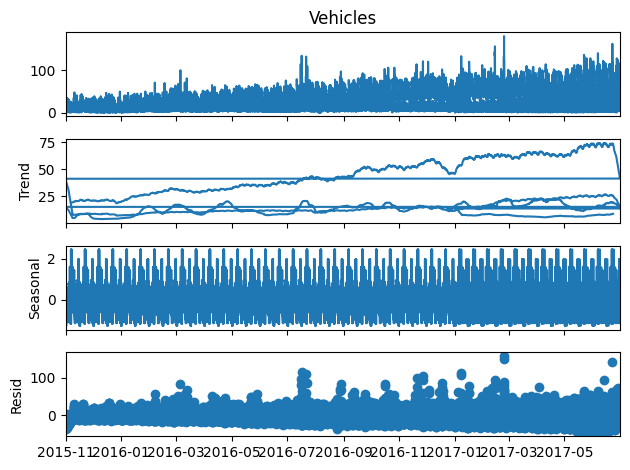

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series to observe trends, seasonality, and residuals
decomposition = seasonal_decompose(df['Vehicles'], model='additive', period=365)
decomposition.plot()
plt.show()


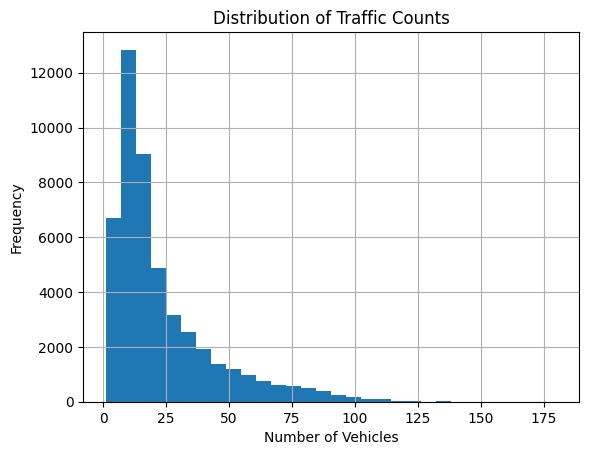

In [11]:
# Plot the distribution of vehicle counts
df['Vehicles'].hist(bins=30)
plt.title('Distribution of Traffic Counts')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()


In [12]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_name()
df['month'] = df.index.month


In [13]:
from sklearn.model_selection import train_test_split

X = df[['hour', 'day_of_week', 'month']]  # Replace with relevant features
y = df['Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Assume df is the DataFrame containing the data, with 'hour', 'day_of_week', 'month', etc.
X = df[['hour', 'day_of_week', 'month']]  # Features for the model
y = df['Vehicles']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical features using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse
X_encoded_train = encoder.fit_transform(X_train[['day_of_week', 'month']])
X_encoded_test = encoder.transform(X_test[['day_of_week', 'month']])

# Convert the encoded columns into a DataFrame
encoded_train_df = pd.DataFrame(X_encoded_train, columns=encoder.get_feature_names_out(['day_of_week', 'month']))
encoded_test_df = pd.DataFrame(X_encoded_test, columns=encoder.get_feature_names_out(['day_of_week', 'month']))

# Reset the index for both original DataFrames and the encoded DataFrames
X_train = X_train.drop(columns=['day_of_week', 'month']).reset_index(drop=True)
X_test = X_test.drop(columns=['day_of_week', 'month']).reset_index(drop=True)

encoded_train_df = encoded_train_df.reset_index(drop=True)
encoded_test_df = encoded_test_df.reset_index(drop=True)

# Concatenate the encoded columns with the rest of the features
X_train = pd.concat([X_train, encoded_train_df], axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")


Mean Squared Error: 375.3151905747338
Mean Absolute Error: 14.530199804947593
Mean Absolute Percentage Error: 1.1594498292184727
